In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# Assignment 3 (Part 2)

We can construct a lattice of two different states:

    1. Uniform spin alignment.
    2. Random spin alignment.
Based on these two systems, we can then use MCMC to plot the magnetization in the system over time, rather than working with tons of calculations. 

In [39]:
N = 20         # Lattice size (NxN grid)
J = 1          # Interaction strength (ferromagnetic)
k_B = 1         # Boltzmann constant
STEPS = 500_000  # Total Monte Carlo steps for Problem A
BURNIN = 50_000  # Burn-in period (initial steps discarded)
B = 0

In [40]:
def compute_energy(lattice):
    #Compute total energy of the Ising lattice.
    energy = 0
    N = lattice.shape[0]
    for i in range(N):
        for j in range(N):
            for k, l in [(-1, 0), (1, 0), (0, 1), (0, -1)]:  # Nearest neighbors
                i_neigh = (i + k) % N  # Periodic BC
                j_neigh = (j + l) % N
                energy += -J * 1/2 *lattice[i, j] * lattice[i_neigh, j_neigh] - B * lattice[i, j]
    return energy # Avoid double-counting

# Energy computation

Recall that the energy stored in our lattice is given by:
$$E(\sigma) = -J \sum_{\langle ij \rangle} \sigma_i \sigma_j - B\sum_{i \in \Lambda} \sigma_i $$

This formula is further simplified by the fact that $J$ is equal to 1.

# Metropolis Hastings algorithm

Since we have a really large sample, we can use the Metropolis Hastings algorithm to either add or disregard new samples within the distribution.

In [41]:
def metropolis(lattice, T, B, steps):
    # Returns magnetization values over time.
    N = lattice.shape[0]
    magnetization = []  # Track magnetization over time
    num_accept = 0  # Count accepted flips

    for _ in tqdm.tqdm(range(steps)):
        i, j = np.random.randint(N), np.random.randint(N)  # Pick random spin
        delta_E = 0

        # Compute energy change ΔE if flipping spin (i, j)
        for k, l in [(-1, 0), (1, 0), (0, 1), (0, -1)]:  # Nearest neighbors
            i_neigh = (i + k) % N
            j_neigh = (j + l) % N
            delta_E += -J * -2 * lattice[i, j] * lattice[i_neigh, j_neigh] - B * lattice[i, j]

        # Metropolis acceptance rule
        if delta_E <= 0 or np.random.random() < np.exp(-delta_E / (k_B * T)):
            lattice[i, j] *= -1  # Flip spin
            num_accept += 1

        # Track magnetization per spin
        magnetization.append(np.mean(lattice))

    acceptance_rate = num_accept / steps
    print(f"Acceptance rate at T={T}: {acceptance_rate:.4f}")
    return magnetization


# Part A
At $T = 2$ we can plot the magnetization of two different lattice configurations with a designated burn-in period. Since this is a random initial distribution, the end result can either be all spins up or all spins down. This and the burn-in period will be shown in the following graph from this code

100%|██████████| 500000/500000 [00:06<00:00, 78349.94it/s]


Acceptance rate at T=3.5: 0.5437


100%|██████████| 500000/500000 [00:06<00:00, 71931.74it/s]


Acceptance rate at T=3.5: 0.5497


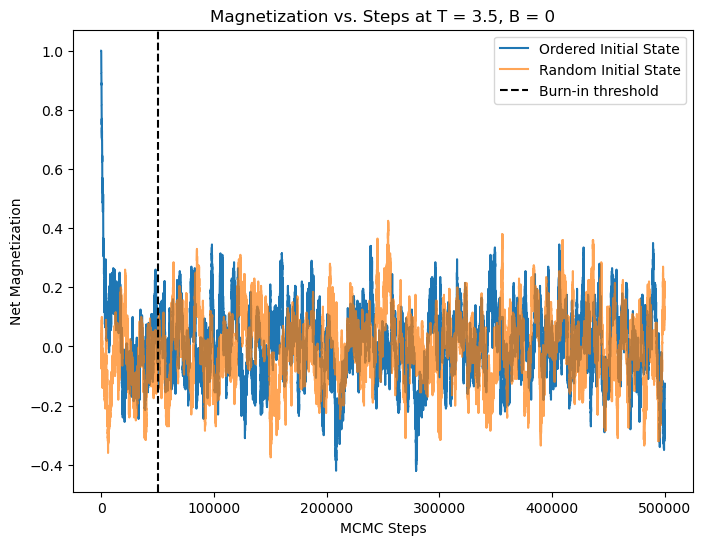

Mean magnetization (Ordered) = 0.0065
Mean magnetization (Random)  = 0.0002


In [42]:
# Run for both initial configurations
def initialize_lattice(N, mode="ordered"):
    # Initialize a NxN Ising lattice.
    # mode="ordered": All spins +1
    # mode="random": Spins randomly +1 or -1
    if mode == "ordered":
        return np.ones((N, N))
    elif mode == "random":
        return np.random.choice([-1, 1], size=(N, N))

T_A = 2
lattice_ordered = initialize_lattice(N, mode="ordered")
lattice_random = initialize_lattice(N, mode="random")

m_ordered = metropolis(lattice_ordered, T_A, B, STEPS)
m_random = metropolis(lattice_random, T_A, B, STEPS)

# Plot magnetization vs. steps
plt.figure(figsize=(8, 6))
plt.plot(range(STEPS), m_ordered, label="Ordered Initial State")
plt.plot(range(STEPS), m_random, label="Random Initial State", alpha=0.7)
plt.axvline(BURNIN, color="black", linestyle="--", label="Burn-in threshold")
plt.xlabel("MCMC Steps")
plt.ylabel("Net Magnetization")
plt.title(f"Magnetization vs. Steps at T = {T_A}, B = {B}")
plt.legend()
plt.show()

# Compute mean magnetization after burn-in
m_mean_ordered = np.mean(m_ordered[BURNIN:])
m_mean_random = np.mean(m_random[BURNIN:])
print(f"Mean magnetization (Ordered) = {m_mean_ordered:.4f}")
print(f"Mean magnetization (Random)  = {m_mean_random:.4f}")

100%|██████████| 500000/500000 [00:06<00:00, 76709.39it/s]


Acceptance rate at T=3.5: 0.2540


100%|██████████| 500000/500000 [00:07<00:00, 69490.80it/s]


Acceptance rate at T=3.5: 0.2515


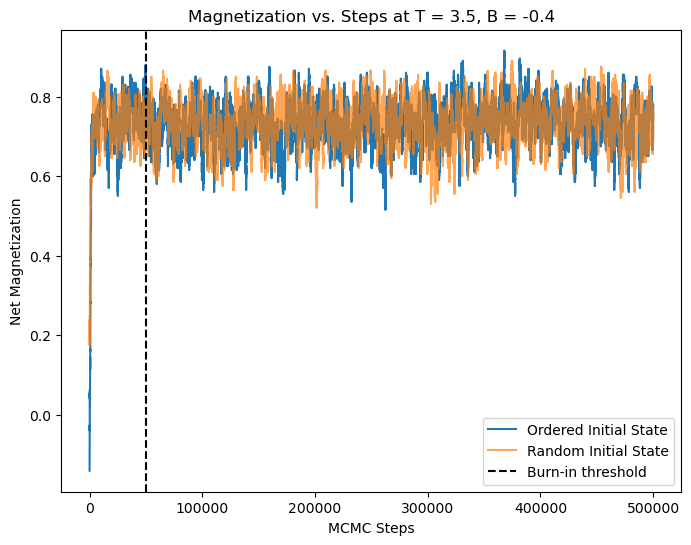

Mean magnetization (Ordered) = 0.7312
Mean magnetization (Random)  = 0.7359


100%|██████████| 500000/500000 [00:06<00:00, 76667.44it/s]


Acceptance rate at T=3.5: 0.3959


100%|██████████| 500000/500000 [00:07<00:00, 69275.57it/s]


Acceptance rate at T=3.5: 0.3953


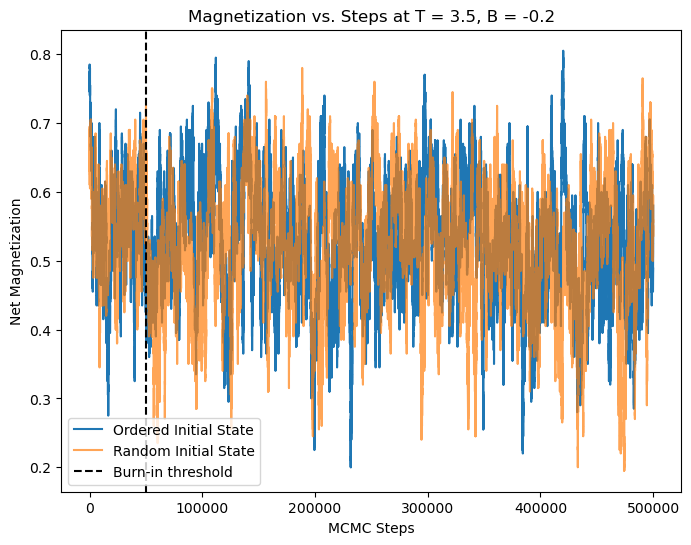

Mean magnetization (Ordered) = 0.5259
Mean magnetization (Random)  = 0.5197


100%|██████████| 500000/500000 [00:06<00:00, 78042.90it/s]


Acceptance rate at T=3.5: 0.5483


100%|██████████| 500000/500000 [00:07<00:00, 71006.25it/s]


Acceptance rate at T=3.5: 0.5480


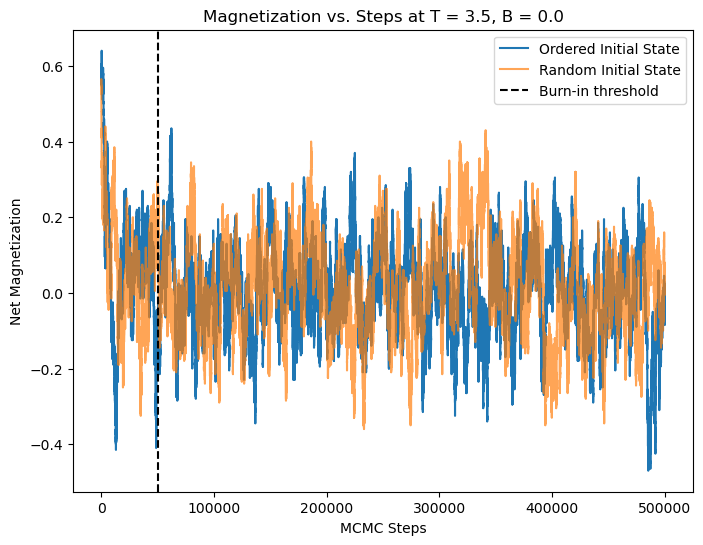

Mean magnetization (Ordered) = -0.0001
Mean magnetization (Random)  = 0.0112


100%|██████████| 500000/500000 [00:06<00:00, 77396.67it/s]


Acceptance rate at T=3.5: 0.3989


100%|██████████| 500000/500000 [00:07<00:00, 69957.96it/s]


Acceptance rate at T=3.5: 0.3945


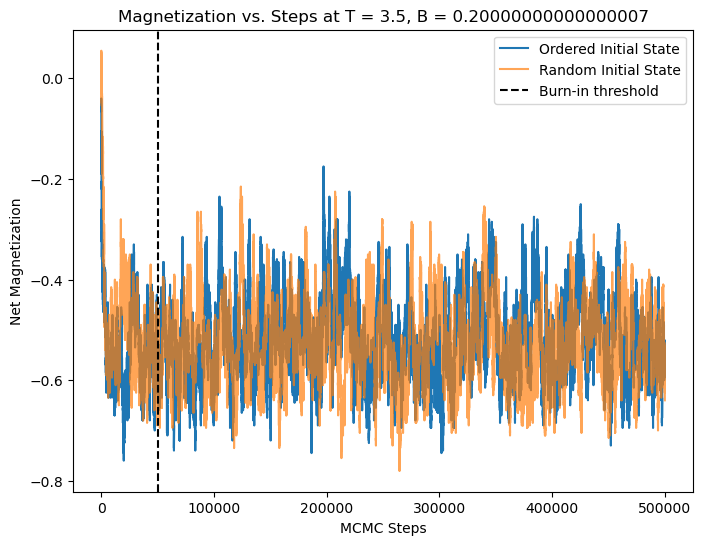

Mean magnetization (Ordered) = -0.5186
Mean magnetization (Random)  = -0.5301


100%|██████████| 500000/500000 [00:06<00:00, 76264.37it/s]


Acceptance rate at T=3.5: 0.2488


100%|██████████| 500000/500000 [00:07<00:00, 69693.03it/s]


Acceptance rate at T=3.5: 0.2544


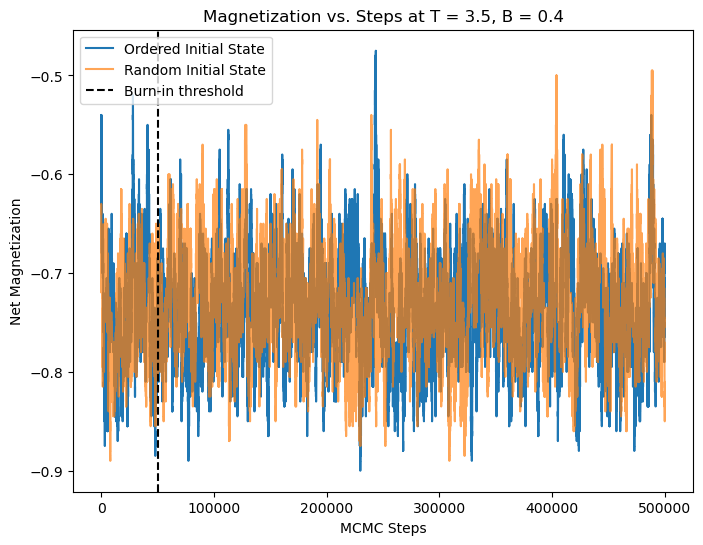

Mean magnetization (Ordered) = -0.7383
Mean magnetization (Random)  = -0.7277


In [43]:
B_vals = np.linspace(-0.4,0.4,5)
for i in B_vals:
    m_ordered = metropolis(lattice_ordered, T_A, i, STEPS)
    m_random = metropolis(lattice_random, T_A, i, STEPS)
    
    # Plot magnetization vs. steps
    plt.figure(figsize=(8, 6))
    plt.plot(range(STEPS), m_ordered, label="Ordered Initial State")
    plt.plot(range(STEPS), m_random, label="Random Initial State", alpha=0.7)
    plt.axvline(BURNIN, color="black", linestyle="--", label="Burn-in threshold")
    plt.xlabel("MCMC Steps")
    plt.ylabel("Net Magnetization")
    plt.title(f"Magnetization vs. Steps at T = {T_A}, B = {i}")
    plt.legend()
    plt.show()
    
    # Compute mean magnetization after burn-in
    m_mean_ordered = np.mean(m_ordered[BURNIN:])
    m_mean_random = np.mean(m_random[BURNIN:])
    print(f"Mean magnetization (Ordered) = {m_mean_ordered:.4f}")
    print(f"Mean magnetization (Random)  = {m_mean_random:.4f}")

100%|██████████| 500000/500000 [00:06<00:00, 73911.20it/s]


Acceptance rate at T=1.0: 0.0004


100%|██████████| 500000/500000 [00:10<00:00, 49686.96it/s]


Acceptance rate at T=1.0: 0.0003


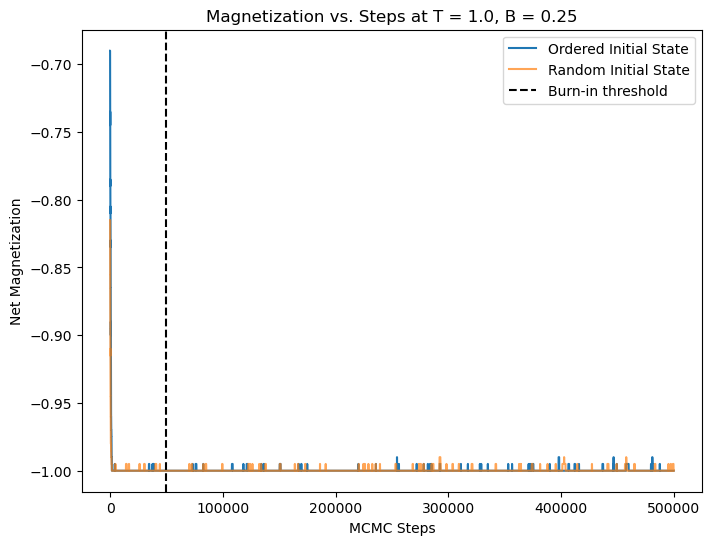

Mean magnetization (Ordered) = -0.9998
Mean magnetization (Random)  = -0.9997


100%|██████████| 500000/500000 [00:06<00:00, 74457.54it/s]


Acceptance rate at T=1.5: 0.0055


100%|██████████| 500000/500000 [00:10<00:00, 49263.43it/s]


Acceptance rate at T=1.5: 0.0059


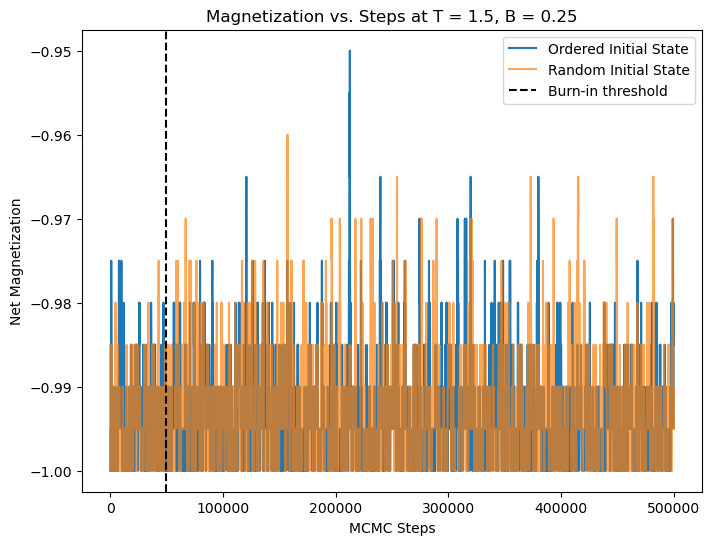

Mean magnetization (Ordered) = -0.9943
Mean magnetization (Random)  = -0.9939


100%|██████████| 500000/500000 [00:06<00:00, 74226.12it/s]


Acceptance rate at T=2.0: 0.0315


100%|██████████| 500000/500000 [00:10<00:00, 49769.98it/s]


Acceptance rate at T=2.0: 0.0308


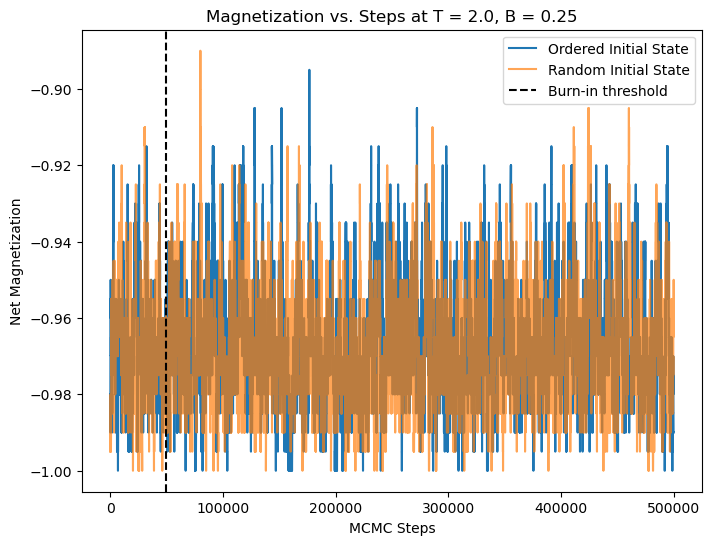

Mean magnetization (Ordered) = -0.9682
Mean magnetization (Random)  = -0.9697


100%|██████████| 500000/500000 [00:06<00:00, 74032.04it/s]


Acceptance rate at T=2.5: 0.0972


100%|██████████| 500000/500000 [00:10<00:00, 49372.56it/s]


Acceptance rate at T=2.5: 0.0953


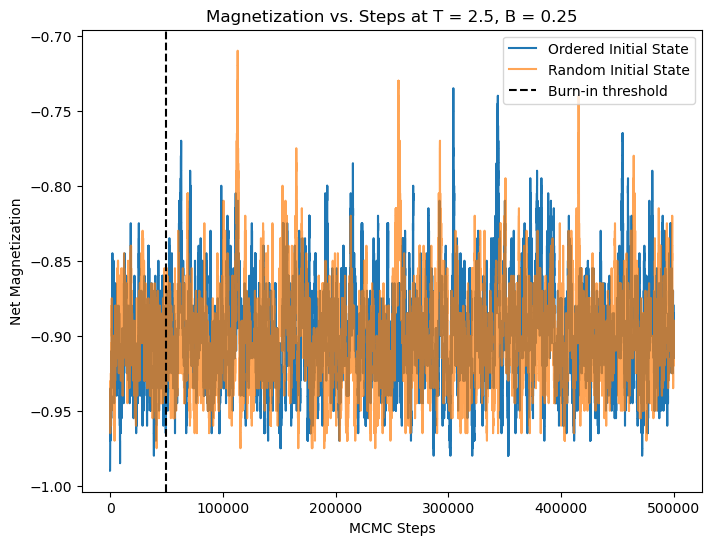

Mean magnetization (Ordered) = -0.8991
Mean magnetization (Random)  = -0.9026


100%|██████████| 500000/500000 [00:06<00:00, 74413.11it/s]


Acceptance rate at T=3.0: 0.2137


100%|██████████| 500000/500000 [00:10<00:00, 49474.91it/s]


Acceptance rate at T=3.0: 0.2102


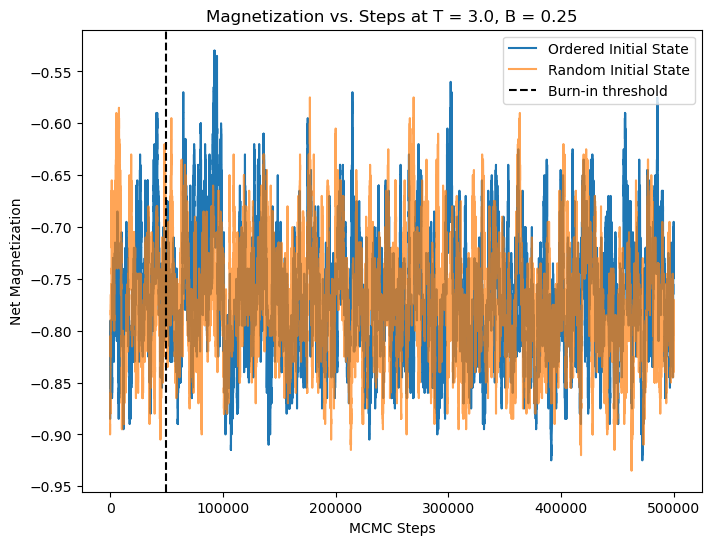

Mean magnetization (Ordered) = -0.7685
Mean magnetization (Random)  = -0.7729


100%|██████████| 500000/500000 [00:06<00:00, 74414.00it/s]


Acceptance rate at T=3.5: 0.3496


100%|██████████| 500000/500000 [00:10<00:00, 49846.34it/s]


Acceptance rate at T=3.5: 0.3490


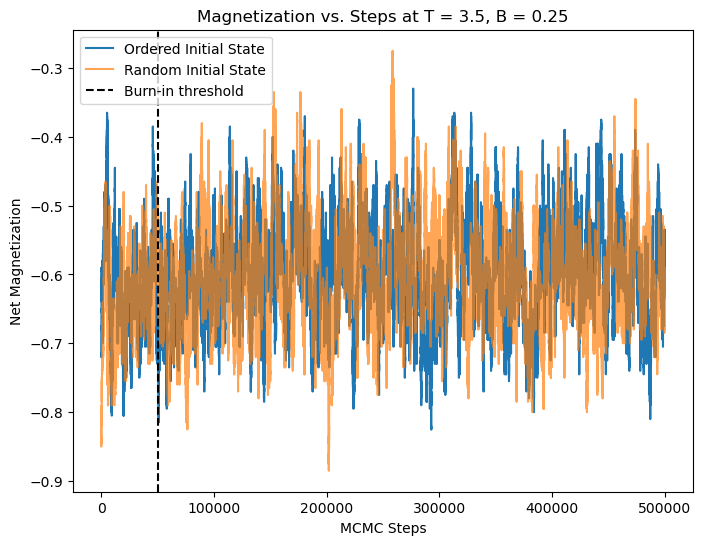

Mean magnetization (Ordered) = -0.5991
Mean magnetization (Random)  = -0.6016


In [44]:
T_vals = np.arange(1,4,0.5)
B = 0.25
for i in T_vals:
    m_ordered = metropolis(lattice_ordered, i, B, STEPS)
    m_random = metropolis(lattice_random, i, B, STEPS)
    
    # Plot magnetization vs. steps
    plt.figure(figsize=(8, 6))
    plt.plot(range(STEPS), m_ordered, label="Ordered Initial State")
    plt.plot(range(STEPS), m_random, label="Random Initial State", alpha=0.7)
    plt.axvline(BURNIN, color="black", linestyle="--", label="Burn-in threshold")
    plt.xlabel("MCMC Steps")
    plt.ylabel("Net Magnetization")
    plt.title(f"Magnetization vs. Steps at T = {i}, B = {B}")
    plt.legend()
    plt.show()
    
    # Compute mean magnetization after burn-in
    m_mean_ordered = np.mean(m_ordered[BURNIN:])
    m_mean_random = np.mean(m_random[BURNIN:])
    print(f"Mean magnetization (Ordered) = {m_mean_ordered:.4f}")
    print(f"Mean magnetization (Random)  = {m_mean_random:.4f}")

Notice that we could in theory get away with a lower burn in, roughly at around 35000 steps, for the random initial state.

# Multiple values of T

We can instead iterate over different temperatures to see how this affects the end result of the mean magnetization. This is going to take a while to run for each lattice.

In [14]:
temps = np.arange(1, 4.2, 0.2)  # T = 1 to 4 in steps of 0.2
m_means = []
m_stds = []

for T in temps:
    lattice = initialize_lattice(N, mode="random")  # Random spins lattice
    m_vals = metropolis(lattice, T, STEPS)
    m_means.append(np.mean(m_vals[BURNIN:]))  # Mean magnetization after burn-in
    m_stds.append(np.std(m_vals[BURNIN:]))    # Standard deviation

# Magnetization vs. Temperature plot
Tc = 2 / np.log(1 + np.sqrt(2))  # Theoretical critical temperature (~2.269)
plt.figure(figsize=(8, 6))
plt.errorbar(temps, np.abs(m_means), yerr=m_stds, fmt="o-", capsize=5, label="Simulation Data") # Plot absolute value of mean magnetization
plt.axvline(Tc, color="r", linestyle="--", label=r"Theoretical $T_c$")
plt.xlabel("Temperature (T)")
plt.ylabel("Mean Magnetization")
plt.title("Magnetization vs. Temperature in 2D Ising Model")
plt.legend()
plt.show()

 67%|██████▋   | 336768/500000 [00:09<00:04, 35826.15it/s]


KeyboardInterrupt: 

Given our value for the critical temperature, we can find the temperature in our data which is the closest to this value and analyze its behavior. If the system reaches this critical temperature, we should expect the system to switch back and forth between ordered and disordered states. If we go lower, the system will settle back into an ordered state.

In [ ]:
print(f"Theoretical Critical Temperature: {Tc:.3f}")
Tc_index = np.argmin(np.abs(temps - Tc))  # Find closest T in the simulation data
print(f"Simulated Magnetization Near Tc ({temps[Tc_index]}): {m_means[Tc_index]:.4f}")
print(f"Standard Deviation at Tc: {m_stds[Tc_index]:.4f}")